In [1]:
import sys, operator, os, string, re, random, math
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

In [2]:
f = open("A7871009.txt", "r", encoding='utf-8')

In [3]:
line_num = 0
speech_dict = {}
tokens = []
text = []

In [4]:
for line in f:
    line = re.sub("[\[].*?[\]]", "", line)
    line = line.replace(".","")
    line = line.replace("!","")
    line = line.replace("?","")
    line = line.replace("xxx","")
    line = line.replace("yyy","")
    line = line.replace("zzz","")
    line = line.replace("(g)","g")
    line = line.replace("<", "")
    line = line.replace(">", "")
    line = line.replace("-", " ")
    line = line.replace("(", "")
    line = line.replace(")", "")
    line = line.replace("+", "")
    line = line.replace("/", "")
    line = line.replace('"', "")
    line = line.replace(",", "")
    line = line.replace("VCM0", "VCM")
    line = line.replace("0 ", "")
    
    speech_line = line.strip().strip('\n').strip()
    token_list = speech_line.split()

    for word in token_list:
        if word[0]=="&" or word[0]=="VCM" or word[0]=="VCM0":
            token_list.remove(word)
    if token_list[0][0] != "@":
        text.append(token_list)

In [5]:
f.close()

In [6]:
# time_dict_fa1 = dict()
# time_dict_fc1 = dict()
# time_dict_chi = dict()
# time_dict_ma1 = dict()
# for i in range(len(text)):
#     if text[i][0][0] == "*":
#         time = text[i][-1].split("_")
#         start = int(time[0][1:])
#         end = int(time[1][:-1])
#         duration = end - start
#         word_count = len(text[i][1:-1])
#         if text[i][0] == "*FA1:":
#             time_dict_fa1[''.join(text[i][1:-1])] = [word_count, start, end, duration]
#         elif text[i][0] == "*EE1:":
#             time_dict_ee1[''.join(text[i][1:-1])] = [word_count, start, end, duration]
#         elif text[i][0] == "*FC1:":
#             time_dict_fc1[''.join(text[i][1:-1])] = [word_count, start, end, duration]
#         elif text[i][0] == "*FAE:":
#             time_dict_ma1[''.join(text[i][1:-1])] = [word_count, start, end, duration]
#         elif text[i][0] == "*CHI:":
#             time_dict_chi[''.join(text[i][1:-1])] = [word_count, start, end, duration]


In [7]:
time_list = []
for i in range(len(text)):
    if text[i][0][0] == "*":
        time = text[i][-1].split("_")
        start = int(time[0][0:])
        end = int(time[1][:-1])
        duration = end - start
        word_count = len(text[i][1:-1])
        time_list.append((text[i][0], word_count, start, end, duration))
print(time_list[0:11])

[('*FA1:', 2, 24039, 25719, 1680), ('*FA1:', 2, 27329, 29409, 2080), ('*CHI:', 0, 28829, 29329, 500), ('*FA1:', 1, 29764, 30304, 540), ('*FA1:', 1, 31629, 32179, 550), ('*CHI:', 0, 33276, 33746, 470), ('*FA1:', 1, 34171, 34791, 620), ('*FA1:', 2, 38406, 38806, 400), ('*FA1:', 6, 40806, 41656, 850), ('*FA1:', 7, 42511, 44151, 1640), ('*FA1:', 1, 45581, 46441, 860)]


In [8]:
participants = {"FA1" : 1, "EE1" : 2, "FAE" : 3, "FC1" : 4, "CHI": 5}
colormapping = {"FA1" : "lightcoral", "EE1" : "sandybrown", "FAE" : "yellowgreen", "FC1" : "tan", "CHI" : "skyblue"}

In [9]:
verts = []
colors = []
for t in time_list:
    v = [(t[2], participants[t[0][1:-1]]-.4),
        (t[2], participants[t[0][1:-1]]+.4),
        (t[3], participants[t[0][1:-1]]+.4),
        (t[3], participants[t[0][1:-1]]-.4),
        (t[2], participants[t[0][1:-1]]-.4),]
    verts.append(v)
    colors.append(colormapping[t[0][1:-1]])

bars = PolyCollection(verts, facecolors = colors)

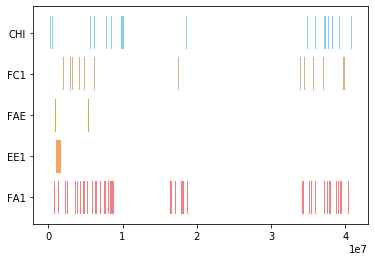

In [10]:
fig, ax = plt.subplots()
ax.add_collection(bars)
ax.autoscale()
ax.set_yticks([1,2,3,4,5])
ax.set_yticklabels(list(participants.keys()))
plt.savefig("vis_A7871009.png")